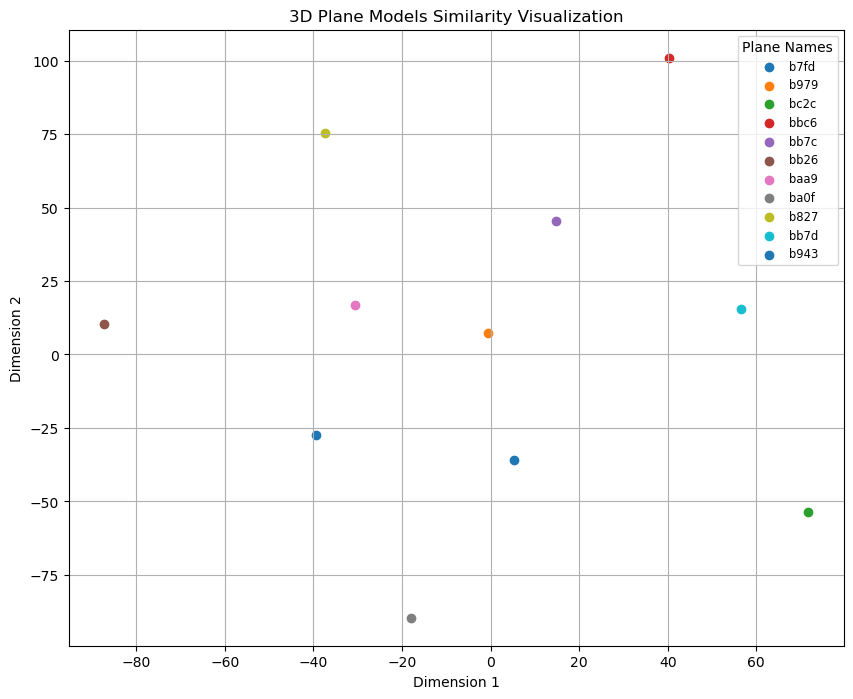

In [5]:
import open3d as o3d
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

def load_obj(file_path):
    mesh = o3d.io.read_triangle_mesh(file_path)
    return mesh

def sample_and_extract_features(mesh, num_points=1224):
    # 对网格进行采样
    sampled_mesh = mesh.sample_points_uniformly(number_of_points=num_points)
    # 获取采样点的坐标
    points = np.asarray(sampled_mesh.points)
    return points.flatten()  # 将采样点展平为一维特征向量

# 指定目录
directory = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/planes'

# 获取目录中所有以.obj结尾的文件
obj_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.obj')]

# 提取文件名前四个字符作为飞机名称
plane_names = [os.path.basename(f)[:4] for f in obj_files]

# 提取每个模型的特征向量
features = []
for file in obj_files:
    mesh = load_obj(file)
    feature_vector = sample_and_extract_features(mesh, num_points=1024)
    features.append(feature_vector)

# 将特征向量转换为矩阵
feature_matrix = np.array(features)

# 使用PCA将特征向量降维到50维（可根据需要调整）
pca = PCA(n_components=10)
pca_features = pca.fit_transform(feature_matrix)

# 使用t-SNE将特征向量进一步降维到2维
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(pca_features)

# 绘制结果
plt.figure(figsize=(10, 8))
for i, name in enumerate(plane_names):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1], label=name)
plt.title('3D Plane Models Similarity Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.legend(title="Plane Names", loc='best', fontsize='small')
plt.show()


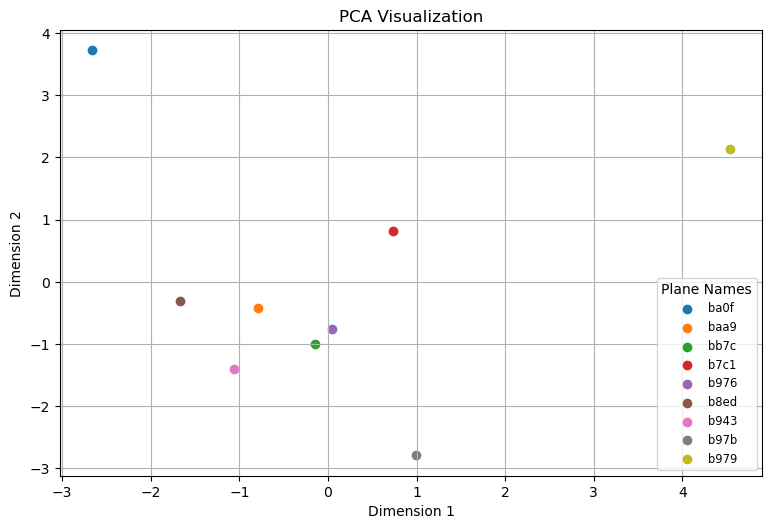

In [9]:
import open3d as o3d
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import os

def load_obj(file_path):
    mesh = o3d.io.read_triangle_mesh(file_path)
    return mesh

def sample_and_extract_features(mesh, num_points=1024):
    # 对网格进行采样
    sampled_mesh = mesh.sample_points_uniformly(number_of_points=num_points)
    # 获取采样点的坐标
    points = np.asarray(sampled_mesh.points)
    return points.flatten()  # 将采样点展平为一维特征向量

# 指定目录
directory = '/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/planes9'

# 获取目录中所有以.obj结尾的文件
obj_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.obj')]

# 提取文件名前四个字符作为飞机名称
plane_names = [os.path.basename(f)[:4] for f in obj_files]

# 提取每个模型的特征向量
features = []
for file in obj_files:
    mesh = load_obj(file)
    feature_vector = sample_and_extract_features(mesh, num_points=1024)
    features.append(feature_vector)

# 将特征向量转换为矩阵
feature_matrix = np.array(features)

# 降维方法列表
methods = {
    "PCA": PCA(n_components=2),
    # "t-SNE": TSNE(n_components=2, perplexity=5, random_state=42),
    # "UMAP": umap.UMAP(n_components=2, random_state=42)
}

# 绘制多个降维方法的可视化结果
plt.figure(figsize=(15, 10))
for i, (method_name, method) in enumerate(methods.items(), 1):
    if method_name == "PCA":
        reduced_features = method.fit_transform(feature_matrix)
    else:
        reduced_features = method.fit_transform(feature_matrix)
    
    plt.subplot(2, 2, i)
    for j, name in enumerate(plane_names):
        plt.scatter(reduced_features[j, 0], reduced_features[j, 1], label=name)
    plt.title(f'{method_name} Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.legend(title="Plane Names", loc='lower right', fontsize='small')

plt.tight_layout()
plt.show()
